#Importing Important libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout, AveragePooling2D
from keras.optimizers import RMSprop

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
import cv2

#Checking images

(408, 612, 3)


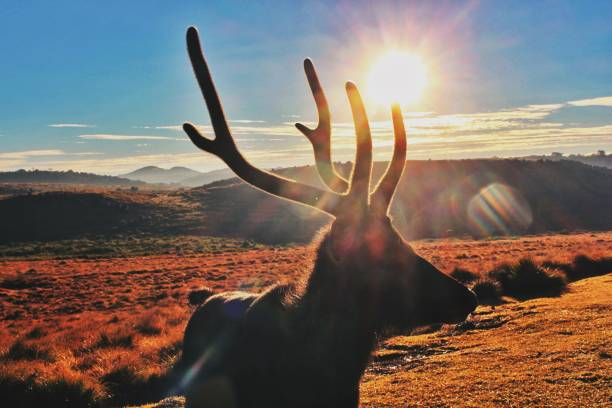

In [ ]:

img = cv2.imread(r'/content/drive/MyDrive/animal_dataset/test/deer/deer_248.jpg')
print(img.shape)
cv2_imshow(img)

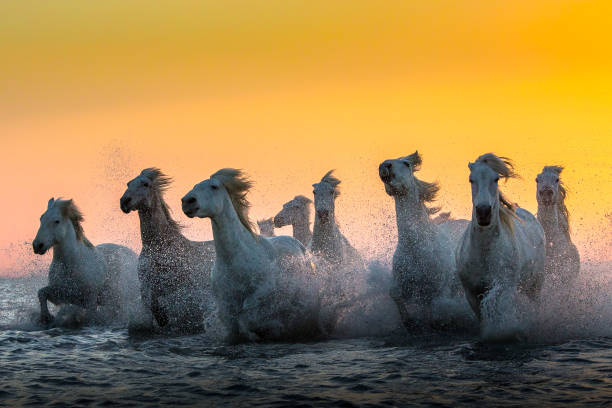

In [ ]:
img1 = cv2.imread(r'/content/drive/MyDrive/animal_dataset/test/horse/horse_240.jpg')
cv2_imshow(img1)

#Image augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Reading images from directory
train_image = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/animal_dataset/train',
                                                target_size=(256, 256),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True,
                                                seed=42
                                                )

test_image = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/animal_dataset/test',
                                                target_size=(256,256),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True,
                                                seed=42
                                                )

Found 629 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


#Model Building


In [ ]:
model = Sequential()

# Input layer
model.add(Conv2D(32, (2,2), activation='relu', input_shape=(256,256,3)))

# Hidden layer-1
model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(AveragePooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

# Hidden layer-2
model.add(Conv2D(128, (2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(AveragePooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
model.add(Dropout(rate=0.20))

# # # Hidden layer-3
# model.add(Conv2D(256, (2,2), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Dropout(rate=0.20))

#faltten layer
model.add(Flatten())
#Droupout layer
model.add(Dropout(rate=0.25))

#Dense layers (Fully connected)
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))

#output layer
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 64)      8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 128)     32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                    

In [ ]:
#compiling model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_image, epochs=20, validation_data=test_image)

Epoch 1/20
20/20 [==============================] - 36s 1s/step - loss: 8.0472 - accuracy: 0.2703 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/20
20/20 [==============================] - 19s 928ms/step - loss: 1.3818 - accuracy: 0.2941 - val_loss: 1.3821 - val_accuracy: 0.2917
Epoch 3/20
20/20 [==============================] - 20s 1s/step - loss: 1.3392 - accuracy: 0.3243 - val_loss: 1.3732 - val_accuracy: 0.3194
Epoch 4/20
20/20 [==============================] - 19s 924ms/step - loss: 1.2872 - accuracy: 0.3863 - val_loss: 1.3531 - val_accuracy: 0.3958
Epoch 5/20
20/20 [==============================] - 19s 939ms/step - loss: 1.2271 - accuracy: 0.4547 - val_loss: 1.3357 - val_accuracy: 0.3958
Epoch 6/20
20/20 [==============================] - 20s 958ms/step - loss: 1.1781 - accuracy: 0.4833 - val_loss: 1.3281 - val_accuracy: 0.3611
Epoch 7/20
20/20 [==============================] - 19s 931ms/step - loss: 1.1882 - accuracy: 0.4881 - val_loss: 1.3030 - val_accuracy: 0.3889
Epoch

##model evaluation

In [ ]:
train_acc = model.evaluate(train_image)
test_acc = model.evaluate(test_image)

5/5 [==============================] - 3s 558ms/step - loss: 1.1745 - accuracy: 0.5208


In [ ]:
train_acc, test_acc

([0.5229123830795288, 0.8060413599014282],
 [1.1744500398635864, 0.5208333134651184])

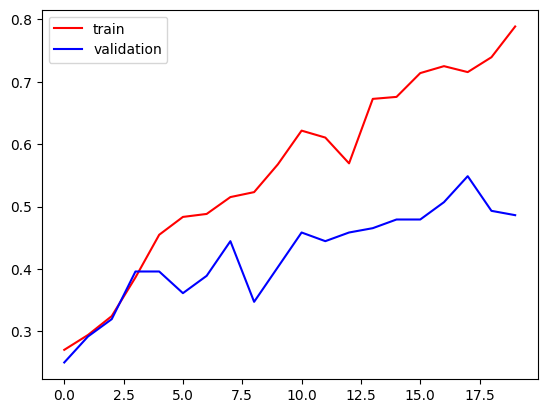

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

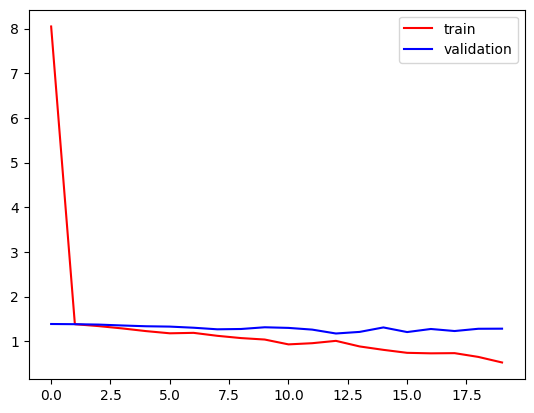

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

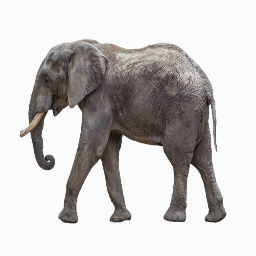

In [ ]:
path = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_1.jpg'
# path = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_10.jpg'
# path = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_106.jpg'
# path = r'/content/drive/MyDrive/animal_dataset/train/giraffe/giraffe_10.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)
img = np.reshape(img,[1,256,256,3])
img = img/255

In [ ]:
classes = model.predict(img)

print(classes)
print(classes.max())

1/1 [==============================] - 0s 273ms/step
[[0.00102184 0.71328694 0.00725797 0.27843335]]
0.71328694


In [ ]:
a = model.predict(img)


1/1 [==============================] - 0s 18ms/step


In [ ]:
cls = ['deer', 'elephant', 'giraffe', 'horse']
cls[np.argmax(a,axis=1)[0]]

'elephant'

**Transfer learning (VGG16)**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))



In [ ]:
conv_base.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Reading images from directory
train_image = train_datagen.flow_from_directory(directory='/content/drive/MyDrive/animal_dataset/train',
                                                target_size=(150,150),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True,
                                                seed=42
                                                )

test_image = test_datagen.flow_from_directory(directory='/content/drive/MyDrive/animal_dataset/test',
                                                target_size=(150,150),
                                                color_mode="rgb",
                                                batch_size=32,
                                                class_mode="categorical",
                                                shuffle=True,
                                                seed=42
                                                )

Found 629 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


In [ ]:
#compiling model

model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_image, epochs=20, validation_data=test_image)

Epoch 1/20
20/20 [==============================] - 16s 657ms/step - loss: 3.0392 - accuracy: 0.4515 - val_loss: 0.9458 - val_accuracy: 0.5625
Epoch 2/20
20/20 [==============================] - 11s 551ms/step - loss: 1.0723 - accuracy: 0.6089 - val_loss: 1.0036 - val_accuracy: 0.6319
Epoch 3/20
20/20 [==============================] - 9s 463ms/step - loss: 0.7538 - accuracy: 0.7059 - val_loss: 0.7273 - val_accuracy: 0.7083
Epoch 4/20
20/20 [==============================] - 10s 495ms/step - loss: 0.6648 - accuracy: 0.7456 - val_loss: 0.7980 - val_accuracy: 0.6806
Epoch 5/20
20/20 [==============================] - 10s 526ms/step - loss: 0.6378 - accuracy: 0.7599 - val_loss: 0.5812 - val_accuracy: 0.7708
Epoch 6/20
20/20 [==============================] - 10s 526ms/step - loss: 0.5398 - accuracy: 0.7949 - val_loss: 0.5543 - val_accuracy: 0.7639
Epoch 7/20
20/20 [==============================] - 9s 461ms/step - loss: 0.5225 - accuracy: 0.8092 - val_loss: 0.6923 - val_accuracy: 0.7361
E

In [ ]:
train_acc = model.evaluate(train_image)
test_acc = model.evaluate(test_image)

5/5 [==============================] - 1s 258ms/step - loss: 0.8510 - accuracy: 0.7639


In [ ]:
train_acc, test_acc

([0.17287172377109528, 0.9316375255584717],
 [0.8509643077850342, 0.7638888955116272])

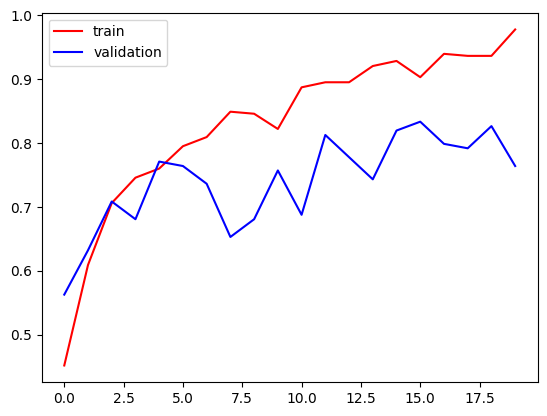

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

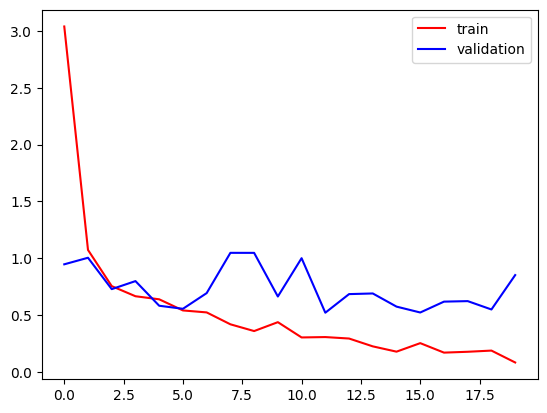

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

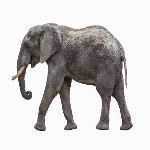

In [ ]:
path = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_1.jpg'
path_1 = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_10.jpg'
path_2 = r'/content/drive/MyDrive/animal_dataset/train/elephant/elephant_106.jpg'
path_3 = r'/content/drive/MyDrive/animal_dataset/train/giraffe/giraffe_10.jpg'
img = cv2.imread(path)
img = cv2.resize(img,(150,150))
cv2_imshow(img)
img = np.reshape(img,[1,150,150,3])
img = img/255

In [ ]:
classes = model.predict(img)

print(classes)
print(classes.max())

1/1 [==============================] - 1s 782ms/step
[[3.5404506e-09 9.9999917e-01 1.6093466e-13 8.5957709e-07]]
0.99999917


In [ ]:
# a = model.predict(img)

In [ ]:
cls = ['deer', 'elephant', 'giraffe', 'horse']
cls[np.argmax(classes,axis=1)[0]]

'elephant'

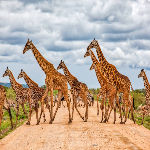

1/1 [==============================] - 0s 19ms/step
[[3.7416749e-04 1.5763049e-04 9.8145789e-01 1.8010372e-02]]
0.9814579


'giraffe'

In [ ]:
img1 = cv2.imread(path_3)
img1 = cv2.resize(img1,(150,150))
cv2_imshow(img1)
img1 = np.reshape(img1,[1,150,150,3])
img1 = img1/255

classes = model.predict(img1)

print(classes)
print(classes.max())

cls[np.argmax(classes,axis=1)[0]]